## MH algorighm simple example

In [14]:
## target density pi: 쌍봉 분포 ##
p = function(x) {
0.5*dnorm(x,0,1) + 0.5*dnorm(x,5,1)
}

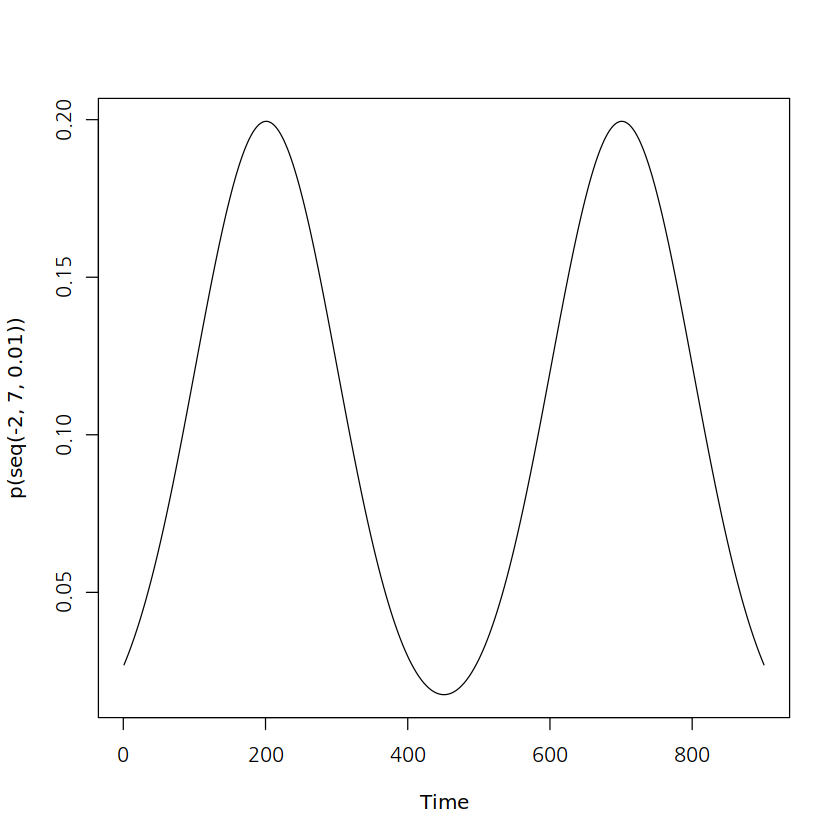

In [22]:
ts.plot(p(seq(-2, 7, 0.01)))

In [37]:
set.seed(111)       # initialization 
xx = rnorm(1,0,1)   ## initial value. 아무 값이나 해도 상관 없음.

for ( j in 1:50000) {
    x = xx[length(xx)]      # 맨 뒤의 x값
    y = rnorm(1,x,1)        # random walk proposal: x에서 분산 1로 튐. N(y | x, 1)
    u = runif(1)            # uniform r.v.: 선택 확률을 적용시키기 위한 변수
    if (u<(p(y)/p(x))) xx = c(xx,y)     # alpha 확률로 accept
    # min(1, p(y)/p(x) ) : acceptance prob. 
    if ((p(y)/p(x))<u) xx= c(xx,x)      # 1-alpha 확률로 reject
}

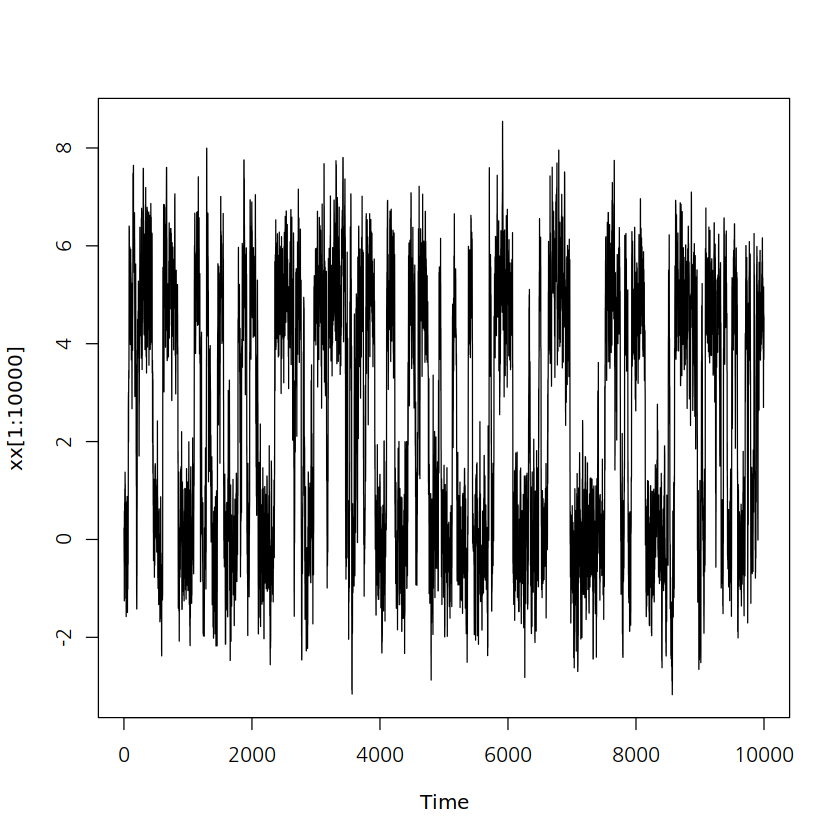

In [38]:
ts.plot(xx[1:10000])

> 모든 영역을 고루 돌아다님. 쌍봉 분포라 가운데를 넘어갈 확률이 크지 않아서, density가 높은 영역에서 많이 움직이고, 그것이 반으로 나뉘어 나타남.
>
> 한쪽 봉우리에만 몰려 있다면, mixing이 잘 안된 것. mixing이 잘 안된 MCMC chain도 있음.

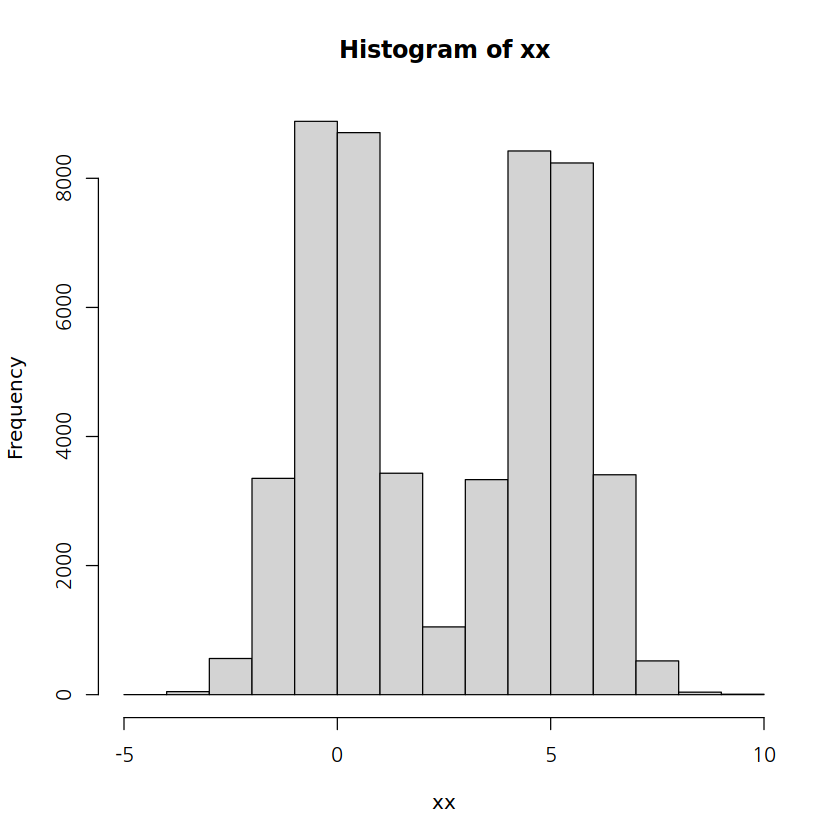

In [39]:
hist(xx)

> 잘 샘플링 된 것 같음...

`-` 초기값에서 움직이면서 stationary distribution으로 변화

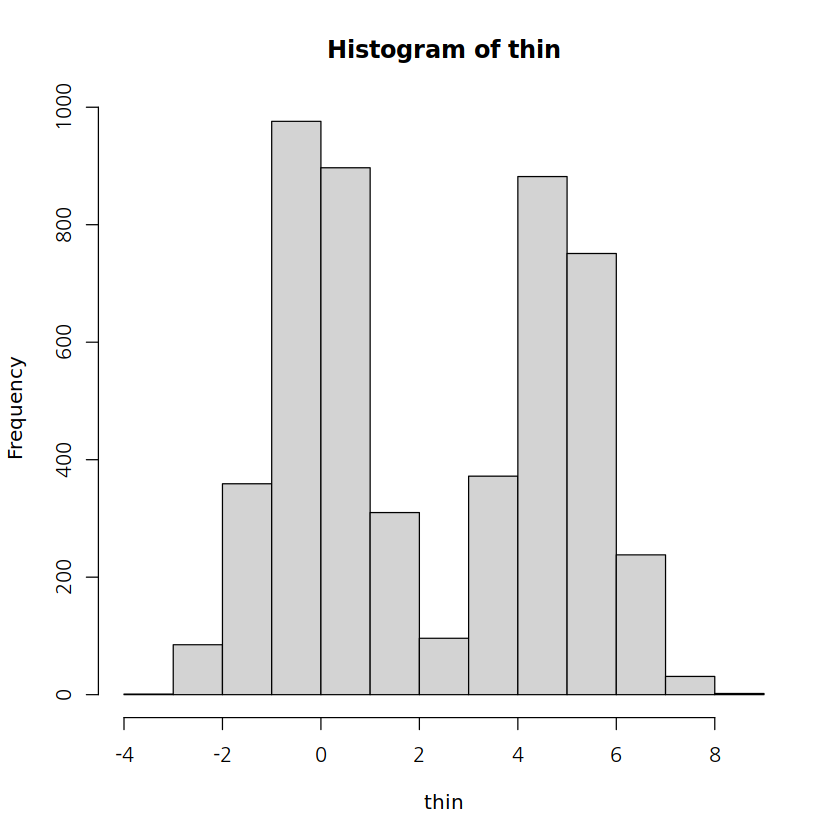

In [28]:
## markov chain의 절반 정도를 끊어버림: burn-in
thin = xx[seq(5001, 10000, by=1)]
hist(thin)

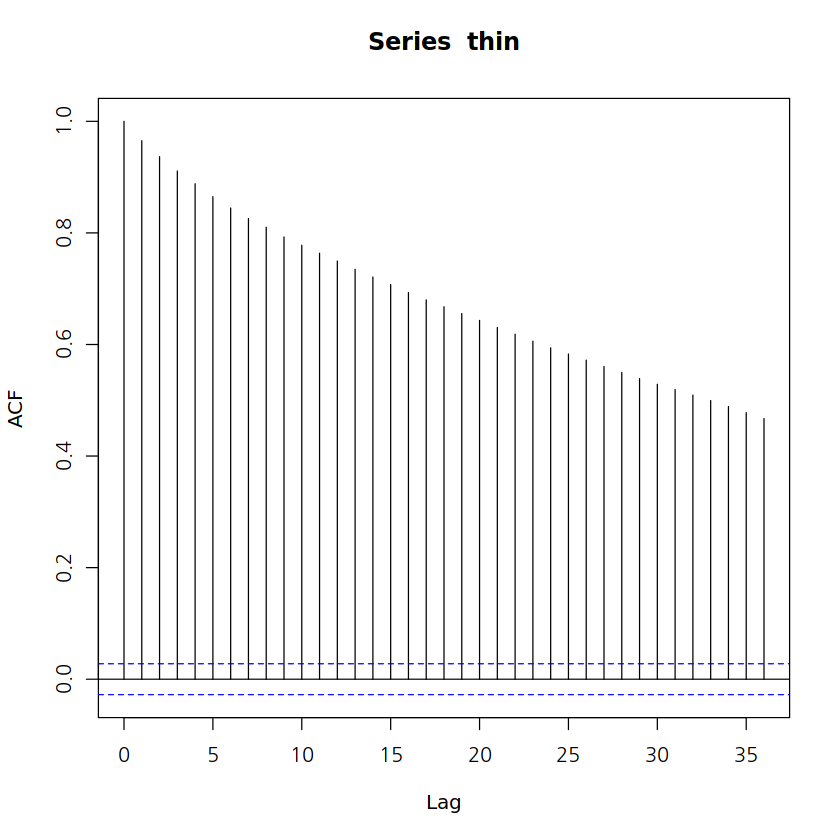

In [29]:
acf(thin)

> Correlation이 매우 높음 $\to$ 분산이 커져서 수렴이 얼마나 잘 되었는지 확인하기 어려움
>
> 더 돌려보거나, thining을 할 수 있음: 특정 간격마다 샘플을 살림

In [40]:
thin = xx[seq(25000, 50000, by = 50)]
length(thin)

[1] 501

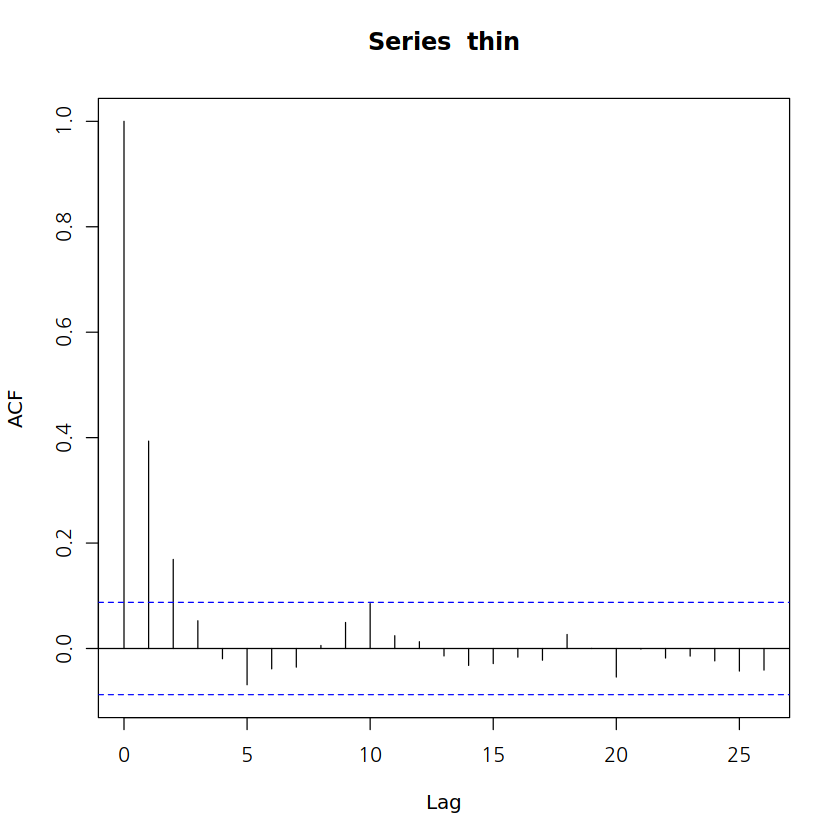

In [41]:
acf(thin)

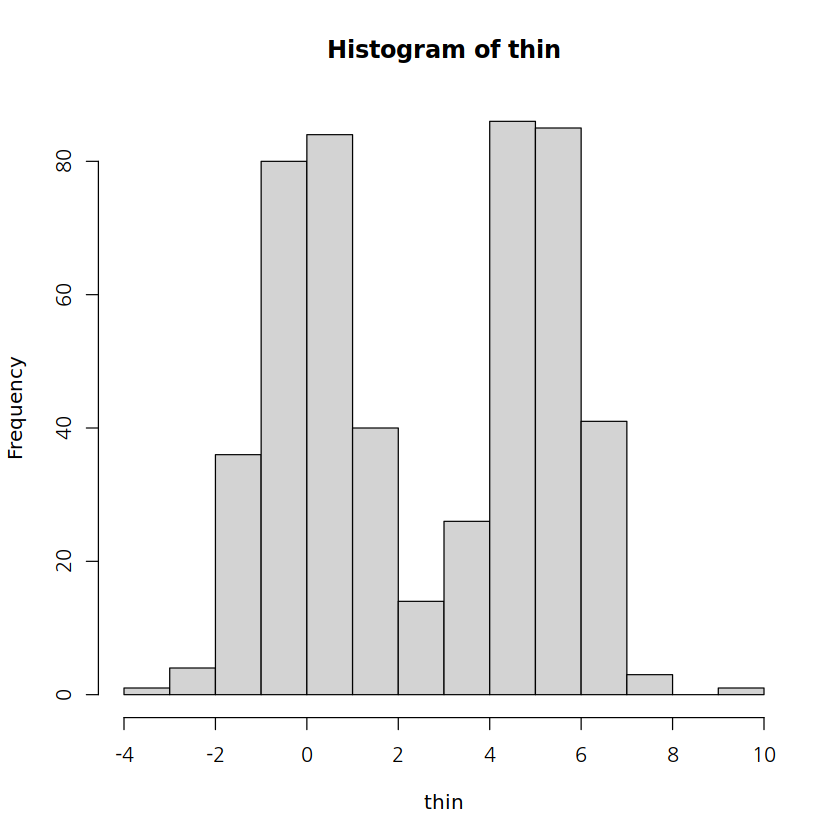

In [42]:
hist(thin)

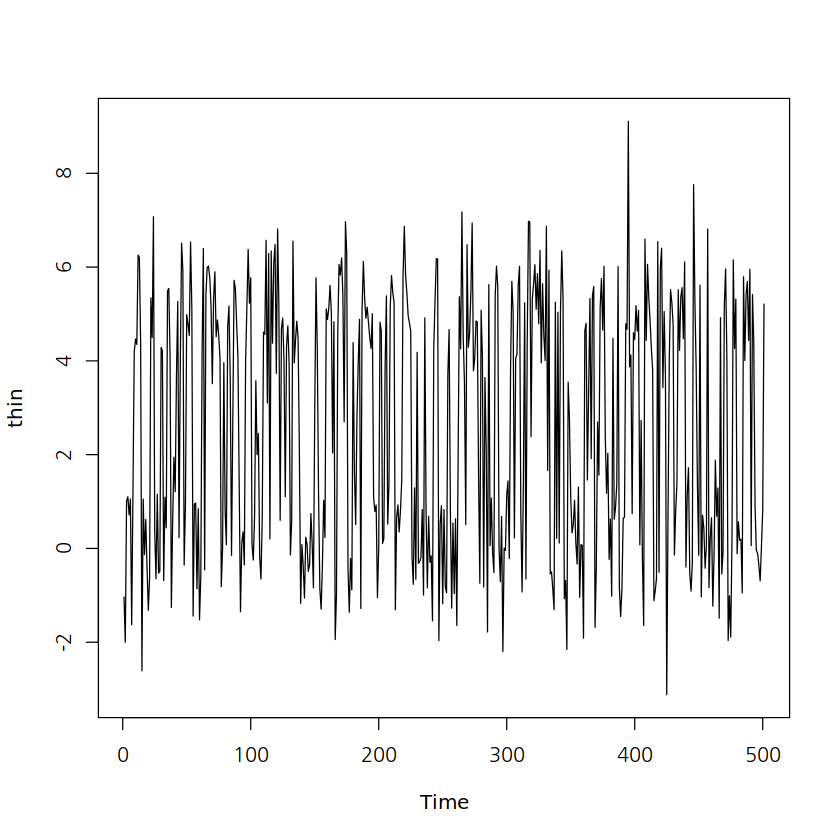

In [43]:
ts.plot(thin)

`-` 어느 정도로 수렴이 되고 있는지를 파악하는 방법: cummulate mean

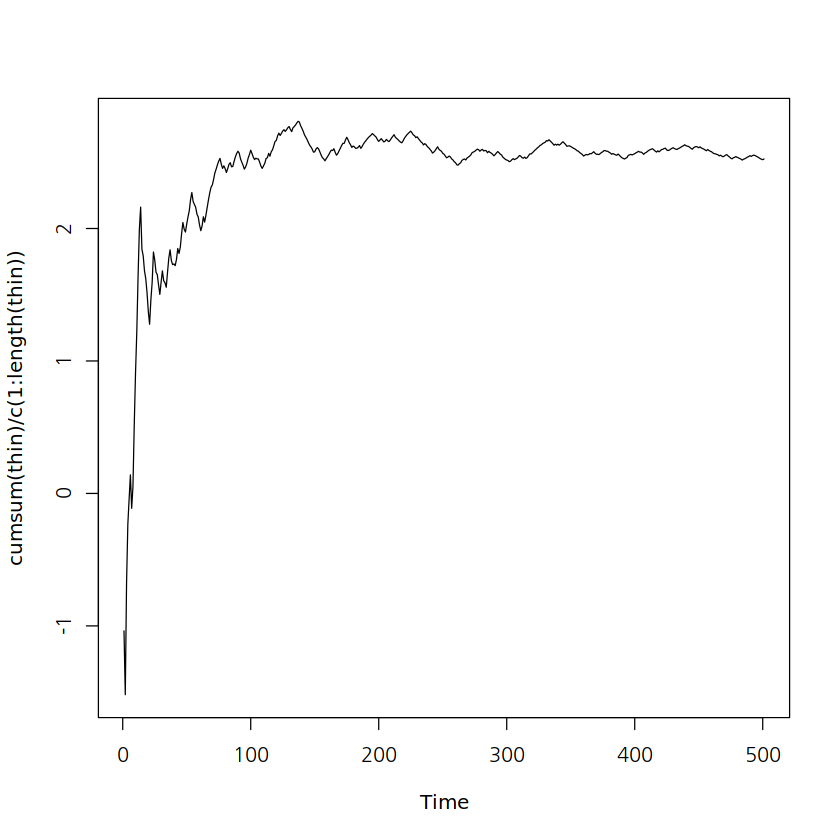

In [46]:
ts.plot(cumsum(thin)/c(1:length(thin)))

> 초반에는 많이 변화, 추후 평균이 안정적

`-` Gelmal-Rubin Statistics

In [47]:
t1 = thin

In [48]:
set.seed(222)       # initialization 
xx = rnorm(1,0,1)   ## initial value. 아무 값이나 해도 상관 없음.

for ( j in 1:50000) {
    x = xx[length(xx)]      # 맨 뒤의 x값
    y = rnorm(1,x,1)        # random walk proposal: x에서 분산 1로 튐. N(y | x, 1)
    u = runif(1)            # uniform r.v.: 선택 확률을 적용시키기 위한 변수
    if (u<(p(y)/p(x))) xx = c(xx,y)     # alpha 확률로 accept
    # min(1, p(y)/p(x) ) : acceptance prob. 
    if ((p(y)/p(x))<u) xx= c(xx,x)      # 1-alpha 확률로 reject
}

t2 = xx[seq(25000, 50000, by = 50)]

In [49]:
set.seed(333)       # initialization 
xx = rnorm(1,0,1)   ## initial value. 아무 값이나 해도 상관 없음.

for ( j in 1:50000) {
    x = xx[length(xx)]      # 맨 뒤의 x값
    y = rnorm(1,x,1)        # random walk proposal: x에서 분산 1로 튐. N(y | x, 1)
    u = runif(1)            # uniform r.v.: 선택 확률을 적용시키기 위한 변수
    if (u<(p(y)/p(x))) xx = c(xx,y)     # alpha 확률로 accept
    # min(1, p(y)/p(x) ) : acceptance prob. 
    if ((p(y)/p(x))<u) xx= c(xx,x)      # 1-alpha 확률로 reject
}

t3 = xx[seq(25000, 50000, by = 50)]

In [ ]:
L = length(t1)
W = (var(t1)+var(t2)+var(t3))/3             ## 분산의 평균
B = L*var(c(mean(t1),mean(t2), mean(t3)))   ## mean의 분산을 계산
gel = (W*(L-1)/L + B/L)/W

In [ ]:
gel ## 1에 가까울 수록 잘 수렴한 것. 실제로는 series를 좀 더 많이 만들어야돼서 잘 안씀

[1] 0.9980283

`-` 알아야 할 것

1. MH 알고리즘의 기본 원리
2. burn-in, thining 개념: MH 아니더라도, 일반적인 markov chain이면 씀
3. cummean, gelman statistics로 수렴 판단 가능

In [57]:
set.seed(444)
yy = rt(1000, 40)   ## prior를 자유도에 둘 것임

In [58]:
p = function(x) {
    rs = log(dnorm(x, 10, 20))  ## prior
    rs = sum(log(dt(yy, x))) + rs   ## likelihood
}

In [59]:
xx = abs(rnorm(1, 0, 1))

for (j in 1:50000) {
    x = xx[length(xx)]
    y = abs(rnorm(1, x, 5))
    u = runif(1)

    if (log(u) < (p(y)/p(x))) xx = c(xx, y)
    if ((p(y)/p(x)) <= log(u)) xx = c(xx, x)
}

ERROR: Error in if (log(u) < (p(y)/p(x))) xx = c(xx, y): missing value where TRUE/FALSE needed


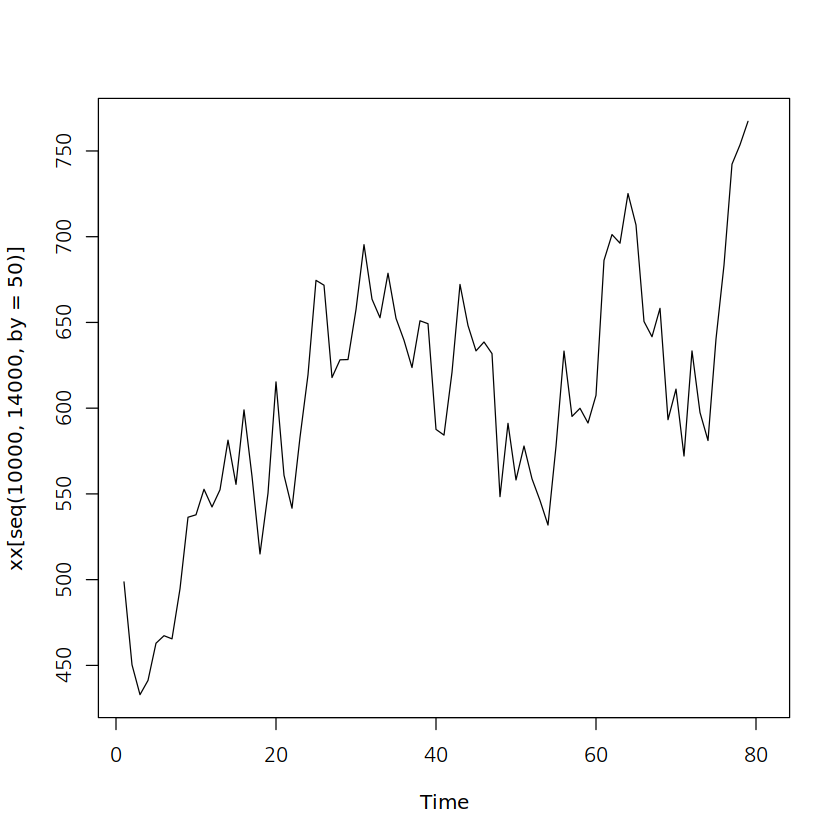

In [64]:
ts.plot(xx[seq(10000, 14000, by = 50)])

> prior, posterior만 잡아주면 됨
>
> 시간도 오래 걸리고, seeding도 해야 되고, 등등...

`-` Naive Bayes: continuous

In [ ]:
# install.packages("klaR")
# install.packages("e1071")

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’, ‘rprojroot’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
data(iris)
library(klaR)
library(e1071)

Loading required package: MASS



In [10]:
train <- sample(1:150, 100) 
nb1 <- naiveBayes(Species ~., data = iris, subset = train, 
                  laplace=1) # Laplace smoothing
# From e1071
default_pred <- predict(nb1, iris[-train,1:4], type="class")
table(default_pred, iris[-train,]$Species,dnn=c("Prediction","Actual"))

            Actual
Prediction   setosa versicolor virginica
  setosa         19          0         0
  versicolor      0         16         2
  virginica       0          0        13